In [1]:
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns  
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler  
from scipy import stats
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline

# setting the working directory

In [2]:
import os as os 

In [3]:
os.chdir("C:\\Users\\MyPC\\Desktop\\Project 7 Python")

In [4]:
os.getcwd()

'C:\\Users\\MyPC\\Desktop\\Project 7 Python'

In [5]:
os.listdir()

['house_price.csv', 'Problem Statement.docx']

# Load the dataset

In [6]:
df_house_price= pd.read_csv('house_price.csv')

In [7]:
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory data analysis

In [8]:
df_house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_house_price.shape

(1460, 81)

df_house_price has 81 columns (79 features + id and target sale price) 1460 entries(number of rows and house sales)

In [10]:
numerical_var= df_house_price.dtypes[df_house_price.dtypes != "object"].index  
                                                            
print("Number of Numerical features: ", len(numerical_var))


categorical_var= df_house_price.dtypes[df_house_price.dtypes == "object"]      
                                                            
print("Number of Categorical features: ", len(categorical_var))



Number of Numerical features:  38
Number of Categorical features:  43


The main check points would be the correlation between the numeric variables and target variable with multicollinearity.

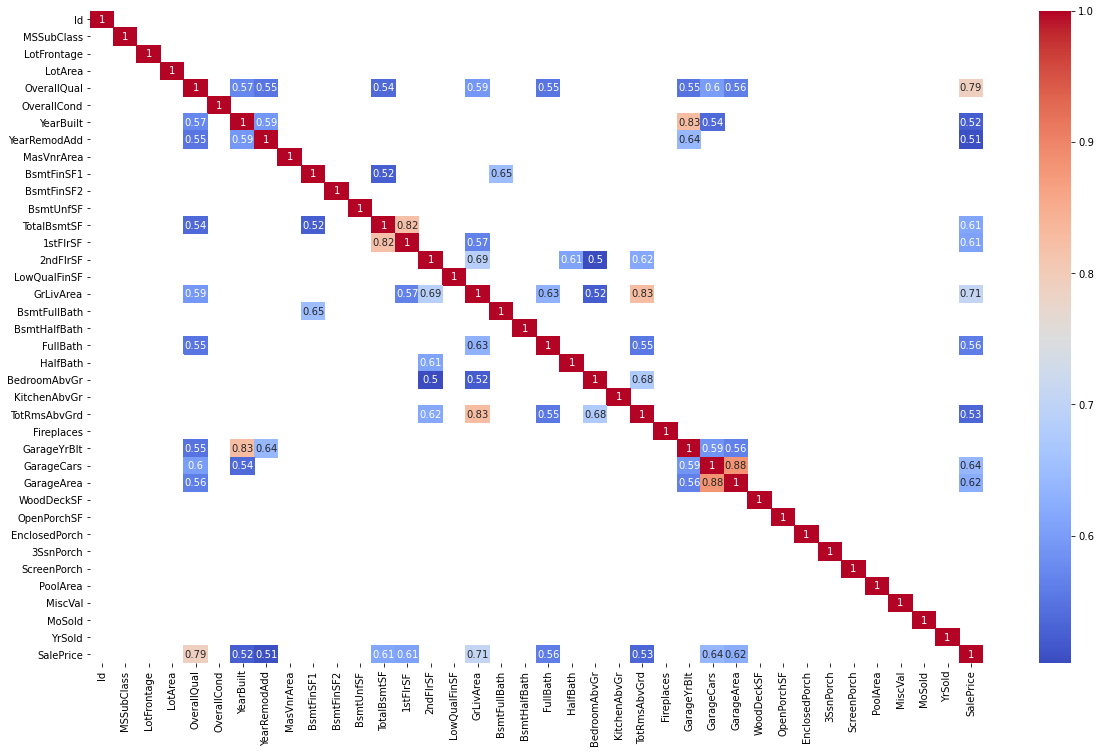

In [11]:
# filter numeric column only
data_num = df_house_price[numerical_var]

# calculating correlation among numeric variable
corr_matrix = data_num.corr()

# filter correlation values above 0.5
filter_corr = corr_matrix[corr_matrix > 0.5] 

# plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(filter_corr,
            cmap='coolwarm',
            annot=True);

# Sale price

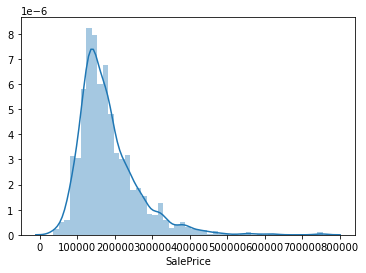

In [12]:
sns.distplot(df_house_price['SalePrice'])

From the above result, We can say that values of "SalePrice" are not a normal distribution. It is positively skewed.
A few people have very expensive house.

# Relationship with numerical variables

# Overall Quality

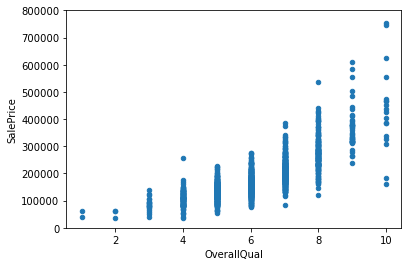

In [13]:
# scatter plot Overall Quality/saleprice
data= pd.concat([df_house_price["SalePrice"], df_house_price["OverallQual"]], axis=1)
data.plot.scatter(x="OverallQual", y="SalePrice", ylim=(0,800000));


From the above result, We can say that the price of the house will be when the overall quality of the house is high. We can 
notice that for the same quality different price. Why? "SalePrice" is correlated with other variables and "OverallQual" might
be correlated with other variables.

# Year Built

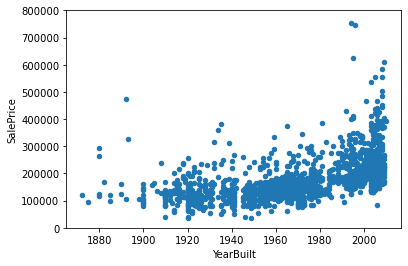

In [14]:
# scatter plot YearBuilt/saleprice
data = pd.concat([df_house_price["SalePrice"], df_house_price["YearBuilt"]], axis=1)
data.plot.scatter(x="YearBuilt", y="SalePrice", ylim=(0,800000));

From the above plot, we can observe that the price of a house is comparatively more than the house was built recently. We also
can notice that there are some outlier which means even if the house is too old. The price of the house is moderately high due
to influences of other variables.

# Ground Living Area

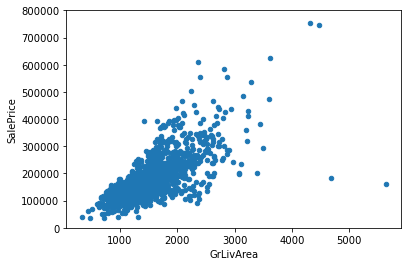

In [15]:
# scatter plot ground living area/saleprice
data = pd.concat([df_house_price["SalePrice"], df_house_price["GrLivArea"]], axis=1)
data.plot.scatter(x="GrLivArea", y="SalePrice", ylim=(0,800000));

While the size of the ground living area is increasing, the price of the houses is increasing. But even if the ground living 
area is high, the price of the house is low and when the ground living area is high, the price of the house is too high. Why?

We know the influence of other variables affects the price change of house.

When "GrLivArea" of a house is highly correlated with other variables, the price of the house is increasing and when "GrLivArea"
of a house is not highly correlated with other variables, the price of the house is decreasing.

# TotalBsmtSF

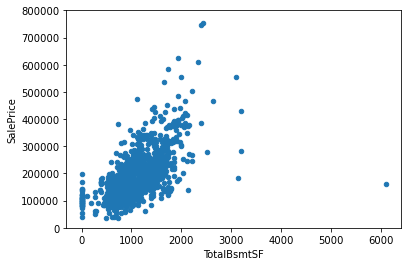

In [16]:
data = pd.concat([df_house_price["SalePrice"], df_house_price["TotalBsmtSF"]], axis=1)
data.plot.scatter(x="TotalBsmtSF", y="SalePrice", ylim=(0,800000));



We can notice that"SalePrice" and "TotalBsmtSF" is with a linear relationship. We can see the value of "SalePrice" is going 
straight when the value of "TotalBsmtSF" is 0. Total Square feet of basement area of a house is high but the price of the house
is low due to the influence of other variables. There are some houses which dont have Bsmt.

# Visualizing categorical variables with "SalePrice"


# House Style

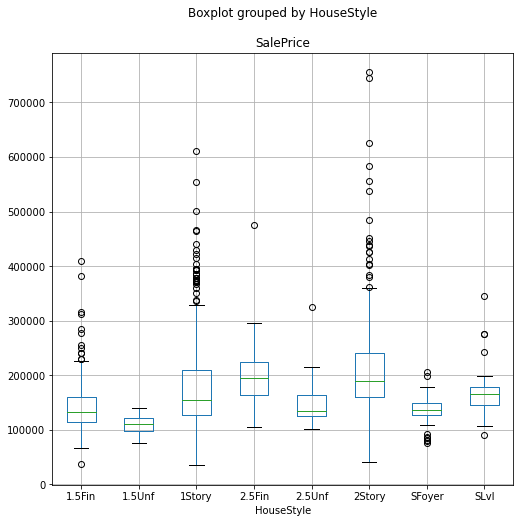

In [17]:
df_house_price.boxplot(column="SalePrice",   
                      by= "HouseStyle",           
                      figsize= (8,8))


# Foundation

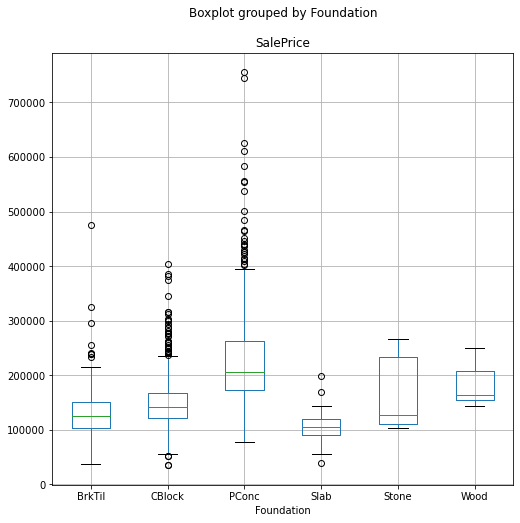

In [18]:
df_house_price.boxplot(column="SalePrice",
                      by= "Foundation",
                      figsize= (8,8))

From the above plot, we can observe that if a house has "Poured Concrete" foundation, the price of the house is higher than 
other house prices.

# Garage Quality

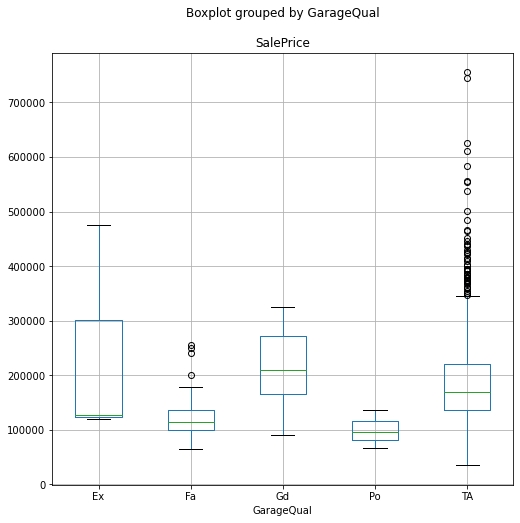

In [19]:
df_house_price.boxplot(column="SalePrice",
                      by="GarageQual",
                      figsize= (8,8))

From the above plot, we can observe that if a house has a good garage, the price of the house is higher than other house prices.
Some houses have an excellent garage. So the price of this kind of house is higher than all.

So far we have compared some variables with the target variable. We observed that what is the variables impact on target variable
based EDA. If we want to reduce dimension, we can take only impact variables. This is one kind of way. Now we will use PCA to 
reduce the dimension of this dataset.

# Before apply PCA we have to handle missing value.

In [20]:
# missing data
total_missing_value = df_house_price.isnull().sum().sort_values(ascending=False)
total_missing_value


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

# Imputing missing values

PooQC: Data discription says NA means "No Pool". In this data set, It has huge ratio of missing value (99%) and majority of 
houses no Pool at all in general.

In [21]:
df_house_price["PoolQC"] = df_house_price["PoolQC"].fillna("None")


# Misc Feature

Data description says NA means "no misc feature"

In [22]:
df_house_price["MiscFeature"] = df_house_price["MiscFeature"].fillna("None")
 

# Alley

Data description says NA means "no alley access"

In [23]:
df_house_price["Alley"] = df_house_price["Alley"].fillna("None")

# Fence

This column has NA value means "no fence"

In [24]:
df_house_price["Fence"] = df_house_price["Fence"].fillna("None")

# FireplaceQu

This column has NA value means "no FireplaceQu"

In [25]:
df_house_price["FireplaceQu"] = df_house_price["FireplaceQu"].fillna("None")

# LotFrontage

The area of each street connected to the house property most likely have a similar area to other houses in its neighbourhood.
so we can fill in missing values by the median LotFrontage of the neighborhood.

In [26]:
df_house_price["LotFrontage"] = df_house_price.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [27]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Garage Type, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [28]:
for i in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_house_price[i] = df_house_price[i].fillna('None')


# GarageYrBlt, GarageArea and GarageCars: Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [29]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_house_price[i] = df_house_price[i].fillna(0)


BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2: For all these categorical basement-related features, Nan means
that there is no basement.

In [30]:
for i in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_house_price[i] = df_house_price[i].fillna('None')
    

MasVnrArea and MasVnrType: NA most likely means no masonry veneer for these houses. We can fill 0 for the Area and None for 
the Type.

In [31]:
df_house_price["MasVnrType"] = df_house_price["MasVnrType"].fillna("None") # categorical variable
df_house_price["MasVnrArea"] = df_house_price["MasVnrArea"].fillna(0)      # numeric variable

MsZoning(The general zoning classification): 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [32]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [33]:
df_house_price["MSZoning"] = df_house_price["MSZoning"].fillna(df_house_price["MSZoning"].mode()[0])


In [34]:
df_house_price["MSZoning"].mode()

0    RL
dtype: object

In [35]:
df_house_price["MSZoning"].mode()[0]

'RL'

Utilities: For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA. Since the house with 
"NoSewa" is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [36]:
df_house_price.Utilities


0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
1455    AllPub
1456    AllPub
1457    AllPub
1458    AllPub
1459    AllPub
Name: Utilities, Length: 1460, dtype: object

In [37]:
df_house_price = df_house_price.drop(['Utilities'], axis=1)

Functional: data description says NA means typecal

In [38]:
df_house_price["Functional"] = df_house_price["Functional"].fillna("Typ")

Electrical: It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value

In [39]:
df_house_price['Electrical'] = df_house_price['Electrical'].fillna(df_house_price['Electrical'].mode()[0])

KitchenQual: Only one NA value, and same as Electrical, we set 'TA'(which is the most frequent) for the missing value in KitchenQual.

In [40]:
df_house_price['KitchenQual'] = df_house_price['KitchenQual'].fillna(df_house_price['KitchenQual'].mode()[0])

Exterior1st and Exterior2nd: Again both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [41]:
df_house_price['Exterior1st'] = df_house_price['Exterior1st'].fillna(df_house_price['Exterior1st'].mode()[0])
df_house_price['Exterior2nd'] = df_house_price['Exterior2nd'].fillna(df_house_price['Exterior2nd'].mode()[0])

SaleType: Fill in again with most frequent which is "WD"

In [42]:
df_house_price['SaleType'] = df_house_price['SaleType'].fillna(df_house_price['SaleType'].mode()[0])

MSSubClass: Na most likely means No building class. We can replace missing values with None

In [43]:
df_house_price['MSSubClass'] = df_house_price['MSSubClass'].fillna("None")

In [44]:
categorical_var = df_house_price.dtypes[df_house_price.dtypes == "object"]


Transforming some numerical variables that are really categorical. we will convert those numerical variables into categorical
variables, this is important before we proceed with the dummy variable creation. Otherewise it will not treat as these variables
as categorical variables and it will treated as numerical variable. 

In [45]:
df_house_price['OverallCond'].dtype

dtype('int64')

If we take the variable "OverallCond" which represents rates the overall condition of the house. so value of this column is from 1to10.

        10   very Excellent
        9    Excellent
        8    Very Good
        7    Good
        6    Above Average
        5    Average
        4    Below Average
        3    Fair
        2    Poor
        1    Very Poor
        
   the datatype of this column is in "int64", but it should be in categorical.

In [46]:
df_house_price.OverallCond.head(10)

0    5
1    8
2    5
3    5
4    5
5    5
6    5
7    6
8    5
9    6
Name: OverallCond, dtype: int64

In [47]:
# Changing OverallCond into a categorical variable
df_house_price['OverallCond'] = df_house_price['OverallCond'].astype(str)

In [48]:
# MSSubClass=The building class
df_house_price['MSSubClass'] = df_house_price['MSSubClass'].apply(str)

In [49]:
# year and month sold are transformed into categorical features
df_house_price['YrSold'] = df_house_price['YrSold'].astype(str)
df_house_price['MoSold'] = df_house_price['MoSold'].astype(str)

Label Encoding some categorical variables that may contain information in their ordering set

In [50]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')


In [51]:
# process columns, apply labelEncoder to categorical features
for c in cols:
    label_ec = LabelEncoder()
    label_ec.fit(list(df_house_price[c].values))
    df_house_price[c] = label_ec.transform(list(df_house_price[c].values))


In [52]:
df_house_price.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,9,RL,65.0,8450,1,1,3,Lvl,Inside,...,0,3,4,None,0,4,2,WD,Normal,208500
1,2,4,RL,80.0,9600,1,1,3,Lvl,FR2,...,0,3,4,None,0,7,1,WD,Normal,181500
2,3,9,RL,68.0,11250,1,1,0,Lvl,Inside,...,0,3,4,None,0,11,2,WD,Normal,223500
3,4,10,RL,60.0,9550,1,1,0,Lvl,Corner,...,0,3,4,None,0,4,0,WD,Abnorml,140000
4,5,9,RL,84.0,14260,1,1,0,Lvl,FR2,...,0,3,4,None,0,3,2,WD,Normal,250000
5,6,8,RL,85.0,14115,1,1,0,Lvl,Inside,...,0,3,2,Shed,700,1,3,WD,Normal,143000
6,7,4,RL,75.0,10084,1,1,3,Lvl,Inside,...,0,3,4,None,0,10,1,WD,Normal,307000
7,8,9,RL,80.0,10382,1,1,0,Lvl,Corner,...,0,3,4,Shed,350,2,3,WD,Normal,200000
8,9,8,RM,51.0,6120,1,1,3,Lvl,Inside,...,0,3,4,None,0,6,2,WD,Abnorml,129900
9,10,3,RL,50.0,7420,1,1,3,Lvl,Corner,...,0,3,4,None,0,0,2,WD,Normal,118000


In [53]:
df_house_price = pd.get_dummies(df_house_price)
print(df_house_price.shape)


(1460, 222)


In [54]:
df_house_price.head(10)

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,9,65.0,8450,1,1,3,0,7,4,...,0,0,0,1,0,0,0,0,1,0
1,2,4,80.0,9600,1,1,3,0,6,7,...,0,0,0,1,0,0,0,0,1,0
2,3,9,68.0,11250,1,1,0,0,7,4,...,0,0,0,1,0,0,0,0,1,0
3,4,10,60.0,9550,1,1,0,0,7,4,...,0,0,0,1,1,0,0,0,0,0
4,5,9,84.0,14260,1,1,0,0,8,4,...,0,0,0,1,0,0,0,0,1,0
5,6,8,85.0,14115,1,1,0,0,5,4,...,0,0,0,1,0,0,0,0,1,0
6,7,4,75.0,10084,1,1,3,0,8,4,...,0,0,0,1,0,0,0,0,1,0
7,8,9,80.0,10382,1,1,0,0,7,5,...,0,0,0,1,0,0,0,0,1,0
8,9,8,51.0,6120,1,1,3,0,7,4,...,0,0,0,1,1,0,0,0,0,0
9,10,3,50.0,7420,1,1,3,0,5,5,...,0,0,0,1,0,0,0,0,1,0


In [55]:
# Remove the target variable
x = df_house_price.drop('SalePrice', axis=1)


# Standardizing input variables

In [56]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardized the dataset
sc_x = StandardScaler()
x_std = sc_x.fit_transform(x)


# 1. Computing the mean vector

In [57]:
# find the mean for each column
mean_vec = np.mean(x_std, axis=0)


# 2. Computing the Covariance Matrix

In [58]:
# find the covariance among variables
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1) 
                   

In [59]:
print(cov_mat)


[[ 1.0006854   0.01992535 -0.00338295 ...  0.00486876  0.01589233
  -0.02075242]
 [ 0.01992535  1.0006854   0.23801249 ...  0.02782127  0.02428959
  -0.09045685]
 [-0.00338295  0.23801249  1.0006854  ...  0.01367554 -0.07309658
   0.12098879]
 ...
 [ 0.00486876  0.02782127  0.01367554 ...  1.0006854  -0.25217909
  -0.03608658]
 [ 0.01589233  0.02428959 -0.07309658 ... -0.25217909  1.0006854
  -0.6547714 ]
 [-0.02075242 -0.09045685  0.12098879 ... -0.03608658 -0.6547714
   1.0006854 ]]


# 3. Computing eigenvectors and corresponding eigenvalues

In [60]:
# find eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [61]:
print(eig_vecs)


[[-1.22992607e-03+0.j -2.62246297e-03+0.j -3.08992209e-03+0.j ...
  -4.66152305e-16+0.j  1.30902513e-16+0.j -3.76860351e-16+0.j]
 [-2.02602159e-02+0.j  5.41907680e-02+0.j -2.46423301e-01+0.j ...
  -7.86590825e-15+0.j -8.23348090e-15+0.j  1.98922936e-17+0.j]
 [ 8.56967539e-02+0.j -7.81882611e-02+0.j -1.90646820e-01+0.j ...
   1.38492768e-15+0.j -1.08358792e-17+0.j  1.20041024e-15+0.j]
 ...
 [-8.57015671e-03+0.j -5.35787772e-03+0.j -1.05832873e-02+0.j ...
  -3.63257210e-02+0.j -3.17113329e-02+0.j -2.25491800e-02+0.j]
 [-6.10245314e-02+0.j -7.54678153e-02+0.j -2.87484034e-02+0.j ...
  -1.19921500e-01+0.j -1.04688098e-01+0.j -7.44412341e-02+0.j]
 [ 1.23240525e-01+0.j  1.08621030e-01+0.j  5.82382188e-02+0.j ...
  -8.74407025e-02+0.j -7.63332745e-02+0.j -5.42787889e-02+0.j]]


In [62]:
print(eig_vals)

[ 1.43545771e+01+0.00000000e+00j  6.99625620e+00+0.00000000e+00j
  6.20668480e+00+0.00000000e+00j  5.05111513e+00+0.00000000e+00j
  3.91489817e+00+0.00000000e+00j  3.73866721e+00+0.00000000e+00j
  3.65467449e+00+0.00000000e+00j  3.32155997e+00+0.00000000e+00j
  3.23279454e+00+0.00000000e+00j  3.03093380e+00+0.00000000e+00j
  2.83012146e+00+0.00000000e+00j  2.72704563e+00+0.00000000e+00j
  2.65547015e+00+0.00000000e+00j  2.58476159e+00+0.00000000e+00j
  2.54702694e+00+0.00000000e+00j  2.41278490e+00+0.00000000e+00j
  2.33801737e+00+0.00000000e+00j  2.33193605e+00+0.00000000e+00j
  2.24155349e+00+0.00000000e+00j  2.18739592e+00+0.00000000e+00j
  2.16766101e+00+0.00000000e+00j  2.11218014e+00+0.00000000e+00j
  2.07644803e+00+0.00000000e+00j  2.01761823e+00+0.00000000e+00j
  1.99770545e+00+0.00000000e+00j  1.93061305e+00+0.00000000e+00j
  1.91931425e+00+0.00000000e+00j  1.91152801e+00+0.00000000e+00j
  1.89033034e+00+0.00000000e+00j  1.86797291e+00+0.00000000e+00j
  1.79514439e+00+0.000000

If eigen value is high for eigen vector that means the vector has a lot of variance.

# 4. Sorting the eigenvectors by decreasing eigenvalues

In [63]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [[np.abs(eig_vals[i]), eig_vecs[:,i]] for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])    

Eigenvalues in descending order:
14.35457707673228
6.99625620295957
6.206684796549184
5.051115127420847
3.9148981706571577
3.738667211557799
3.6546744872361017
3.3215599714601387
3.2327945420388375
3.0309338017003644
2.8301214592050514
2.7270456268507957
2.6554701471687894
2.5847615941048745
2.547026938598462
2.412784902914043
2.3380173709986787
2.331936054421661
2.2415534911013157
2.1873959168632418
2.1676610081593912
2.112180142745619
2.076448033601474
2.0176182307177943
1.9977054456313652
1.9306130480646542
1.919314246252384
1.9115280065976201
1.8903303364247754
1.8679729067827566
1.7951443883406513
1.775193482879114
1.739046627555155
1.7268436335267228
1.690158470000933
1.651938904629075
1.6031543058673516
1.581095924365893
1.5523763902067673
1.537028042588036
1.5169870977166944
1.485255106252361
1.479131722341288
1.452200691211437
1.4327370457775057
1.4297065538575133
1.4077686741279172
1.3976104428176452
1.368981728227354
1.3607757896602046
1.3422698168749896
1.3164745797540858
1

All the eigen values are sorted in an descending order.

# 5. Select components based on eigen values

We have 221 components from which we have to select components based on eigen value which has high value.
Here, filter out eigen values which has above 0.5

In [64]:
pairs = np.array(eig_pairs)
count = 0
components = []
for i in range (len(eig_pairs)):
    if eig_pairs[i][0] >= 0.5:
        count += 1
        components.append(pairs[i])
print("Number of components: " + str(count)) 

Number of components: 138


When we select the eigen value as 0.5 or above 0.5, we get 138 components. 0.5 is not a threshold eigen value. We use this 
value to check the percentage fo information the selected component carry. It the selected component gives less information
we select more components and this can be achieved by setting eigen value below 0.5

Lets check how much information the selected components contains

In [65]:
# calculate explained variance
total = 0                            
ein = []                             
for i in range(len(components)):
    total += components[i][0]
    ein.append(components[i][0])
    
# divide eigen value by total eigen value and then multiple with 100 for the selected components
var_exp = [(i / sum(eig_vals))*100 for i in sorted(ein, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


In [66]:
cum_var_exp

array([ 6.49083492+0.j,  9.6543934 +0.j, 12.46092446+0.j, 14.74493146+0.j,
       16.51516527+0.j, 18.20571119+0.j, 19.85827739+0.j, 21.36021627+0.j,
       22.82201731+0.j, 24.19254121+0.j, 25.47226203+0.j, 26.70537415+0.j,
       27.90612136+0.j, 29.07489567+0.j, 30.22660716+0.j, 31.31761725+0.j,
       32.37481906+0.j, 33.42927102+0.j, 34.44285391+0.j, 35.43194789+0.j,
       36.41211817+0.j, 37.36720117+0.j, 38.30612688+0.j, 39.218451  +0.j,
       40.12177098+0.j, 40.9947532 +0.j, 41.86262634+0.j, 42.72697871+0.j,
       43.58174595+0.j, 44.42640363+0.j, 45.2381298 +0.j, 46.04083459+0.j,
       46.82719455+0.j, 47.60803657+0.j, 48.37229034+0.j, 49.11926203+0.j,
       49.84417436+0.j, 50.55911236+0.j, 51.261064  +0.j, 51.95607544+0.j,
       52.64202479+0.j, 53.31362561+0.j, 53.98245756+0.j, 54.63911188+0.j,
       55.28696514+0.j, 55.93344809+0.j, 56.57001118+0.j, 57.20198095+0.j,
       57.82100541+0.j, 58.43631933+0.j, 59.04326523+0.j, 59.63854708+0.j,
       60.23013942+0.j, 6

We can notice that 138 components has 93.53% information among all components.
When we select 138 components we lose 6.47% information.

# 6. Select components based on scree plot

Now we are going to do a scree plot to visualize the variance explained by the number fo components on the x axis

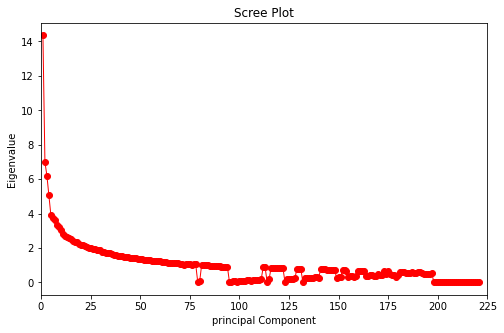

In [67]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# made a random array and then make it positive-definite
num_vars = len(eig_vals)   
num_obs = 9

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1     
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=1)    

plt.title('Scree Plot')
plt.xlabel('principal Component')
plt.ylabel('Eigenvalue')
plt.xlim(0,225)
plt.show()


Scree plot shows eigen value for each component. starting components has high value and in middle, some component has higher than
others. What can we do using scree plot? We can select components based scree plot. If we select 150 components based on scree 
plot, We have to check how much information has the selected components.

The following plot to shows percentage fo variance explained by each of the selected components.

In [69]:
# calculate explained variance
total = sum(eig_vals)

# divide eigen value by total eigen value and then multiple with 100 for the selected components
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

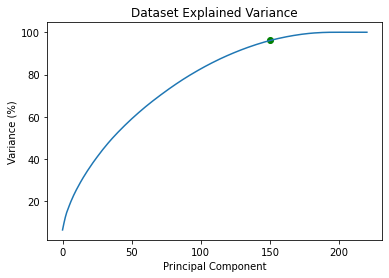

In [70]:
plt.figure()
plt.scatter([150],[cum_var_exp[150]],color='g')
plt.plot(cum_var_exp)
plt.xlabel('Principal Component')
plt.ylabel('Variance (%)')  # for each component
plt.title('Dataset Explained Variance')
plt.show()

So here 150 principal components are explaining somewhere around 95 or 96% variance. So he just want to show 150 prin. comp.
showing 95 or 96%.
From the above plot, we can observe that the variance remains constant after the number of components reaches 150

In [71]:
cum_var_exp[150]

(96.0995155407011+0j)

From the above result, we can see that the selected 150 components has 96% information. Here we lose 4% information. We have
to select less component than original variable, at the same time, the  selected component must contains as much as information.

# 7. Deriving the new dataset

Finally, we select only 150 components. Filter out eigen vector of he selected components. 

In [72]:
N = 221
M = 150

a = np.ndarray(shape = (N, 0))
for i in range(M):
    b = eig_pairs[i][1].reshape(N,1)
    a = np.hstack((a,b))


Perform matrix calculation of original dataset with eigen vector of selected components.

In [73]:
a

array([[-0.00122993+0.j, -0.00262246+0.j, -0.00308992+0.j, ...,
         0.02128375+0.j, -0.02956072+0.j,  0.02828235+0.j],
       [-0.02026022+0.j,  0.05419077+0.j, -0.2464233 +0.j, ...,
        -0.03961217+0.j,  0.00494863+0.j,  0.02120039+0.j],
       [ 0.08569675+0.j, -0.07818826+0.j, -0.19064682+0.j, ...,
        -0.07964557+0.j, -0.15700667+0.j, -0.08693511+0.j],
       ...,
       [-0.00857016+0.j, -0.00535788+0.j, -0.01058329+0.j, ...,
         0.0526075 +0.j, -0.01911777+0.j, -0.03140392+0.j],
       [-0.06102453+0.j, -0.07546782+0.j, -0.0287484 +0.j, ...,
        -0.0070809 +0.j, -0.01666643+0.j, -0.00773973+0.j],
       [ 0.12324052+0.j,  0.10862103+0.j,  0.05823822+0.j, ...,
        -0.02084388+0.j,  0.00570488+0.j,  0.01271086+0.j]])

In [74]:
# Projection onto the New feature space
Y = x_std.dot(a)


In [76]:
Y.shape

(1460, 150)

In [77]:
Y

array([[ 3.15172011+0.j,  1.21878173+0.j,  0.34350202+0.j, ...,
         0.05412658+0.j,  0.07858162+0.j, -0.14685771+0.j],
       [-0.40369184+0.j, -2.94273142+0.j,  0.37119922+0.j, ...,
         0.29748698+0.j, -0.9795956 +0.j,  0.02092249+0.j],
       [ 3.45984419+0.j,  0.84736524+0.j,  0.09569296+0.j, ...,
        -0.21419079+0.j,  0.2568009 +0.j,  0.14140836+0.j],
       ...,
       [ 0.24086792+0.j,  1.7220848 +0.j, -3.21917314+0.j, ...,
         1.0885956 +0.j, -1.9170509 +0.j,  0.6719719 +0.j],
       [-3.0151936 +0.j, -3.09806924+0.j,  1.58955202+0.j, ...,
        -0.59981306+0.j,  0.03426459+0.j,  0.22867934+0.j],
       [-0.92426149+0.j, -3.52702079+0.j,  0.87559633+0.j, ...,
        -0.61270902+0.j, -0.08401412+0.j,  0.81225212+0.j]])

In [79]:
Y

array([[ 3.15172011+0.j,  1.21878173+0.j,  0.34350202+0.j, ...,
         0.05412658+0.j,  0.07858162+0.j, -0.14685771+0.j],
       [-0.40369184+0.j, -2.94273142+0.j,  0.37119922+0.j, ...,
         0.29748698+0.j, -0.9795956 +0.j,  0.02092249+0.j],
       [ 3.45984419+0.j,  0.84736524+0.j,  0.09569296+0.j, ...,
        -0.21419079+0.j,  0.2568009 +0.j,  0.14140836+0.j],
       ...,
       [ 0.24086792+0.j,  1.7220848 +0.j, -3.21917314+0.j, ...,
         1.0885956 +0.j, -1.9170509 +0.j,  0.6719719 +0.j],
       [-3.0151936 +0.j, -3.09806924+0.j,  1.58955202+0.j, ...,
        -0.59981306+0.j,  0.03426459+0.j,  0.22867934+0.j],
       [-0.92426149+0.j, -3.52702079+0.j,  0.87559633+0.j, ...,
        -0.61270902+0.j, -0.08401412+0.j,  0.81225212+0.j]])